In [1]:
import pandas as pd

# 데이터 불러오기
data = pd.read_csv('C:/Users/82106/Desktop/데이터 분석 프로젝트 2/데이콘 빅데이터 분석/data/국토안전관리원_공공건축물 에너지 소비량_20230331.csv',encoding='cp949')

In [2]:
# 데이터 기본 정보 확인
print(data.info())
print(data.describe())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4004 entries, 0 to 4003
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   지역                                     4004 non-null   object 
 1   용도                                     4004 non-null   object 
 2   면적                                     4004 non-null   object 
 3   기관유형                                   4004 non-null   object 
 4   코드번호                                   4004 non-null   object 
 5   기관명                                    4004 non-null   object 
 6   건물명                                    4004 non-null   object 
 7   소재지                                    3991 non-null   object 
 8   연면적                                    4004 non-null   float64
 9   냉난방면적                                  4004 non-null   float64
 10  지하                                     3859 non-null   float64
 11  지상  

In [3]:
# 범주형 변수
categorical_cols = ['지역', '용도', '기관유형']

# 수치형 변수
numerical_cols = ['연면적', '냉난방면적', '지하', '지상', '연간 단위면적당 1차 에너지 소비량 3개년 평균 중간값', '간절기 대비 소비량 비율[(냉방월 +난방월)/간절기월] 3개년 평균', '간절기 대비 소비량 비율[(냉방월 +난방월)/간절기월] 2개년 평균', '간절기 대비 소비량 비율[(냉방월 +난방월)/간절기월] 1개년 평균']


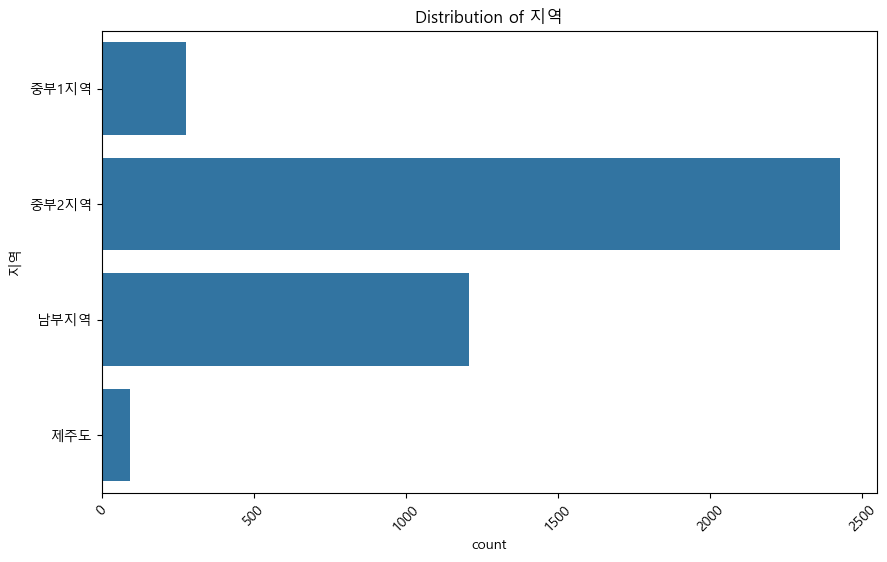

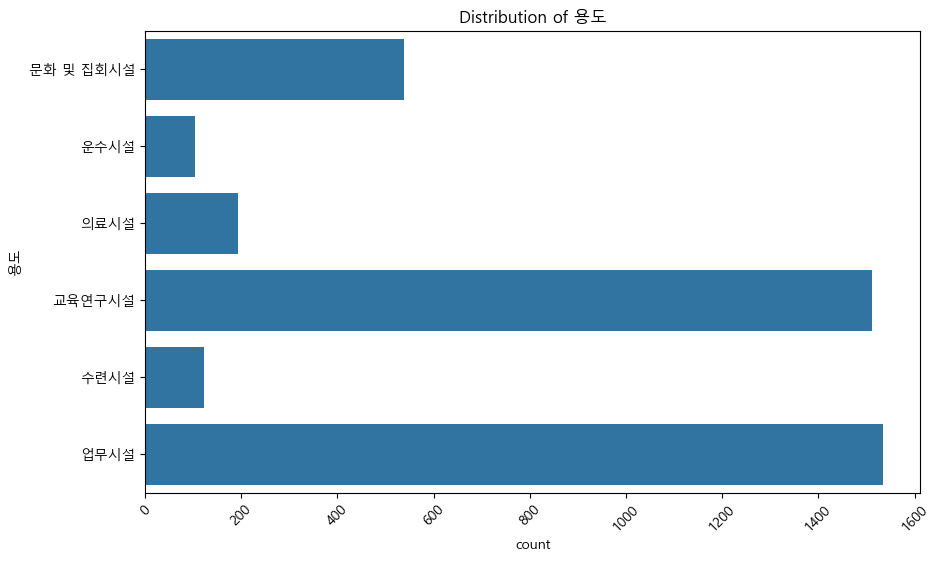

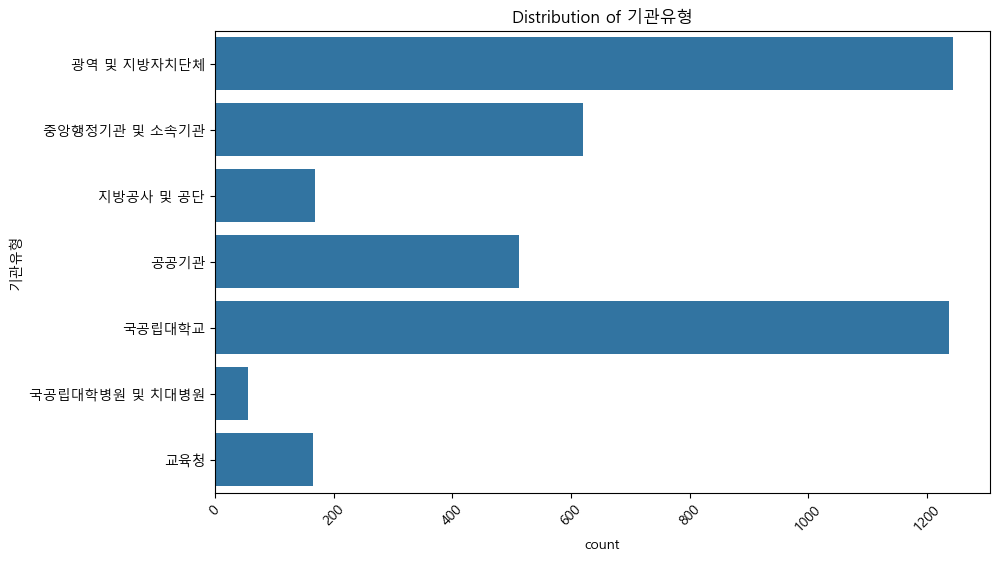

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

#한글폰트
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 경로 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 여기서 'malgun.ttf'는 예시로 사용한 것이며, 실제 한글 폰트 파일로 변경해야 합니다.
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

# 범주형 변수 분포 시각화
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data[col])
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


In [5]:
import pandas as pd

# 데이터 불러오기
data = pd.read_csv('C:/Users/82106/Desktop/데이터 분석 프로젝트 2/데이콘 빅데이터 분석/data/preprocessed_data(국토안전관리원_공공건축물 에너지 소비량_20230331.csv).csv',encoding='cp949')

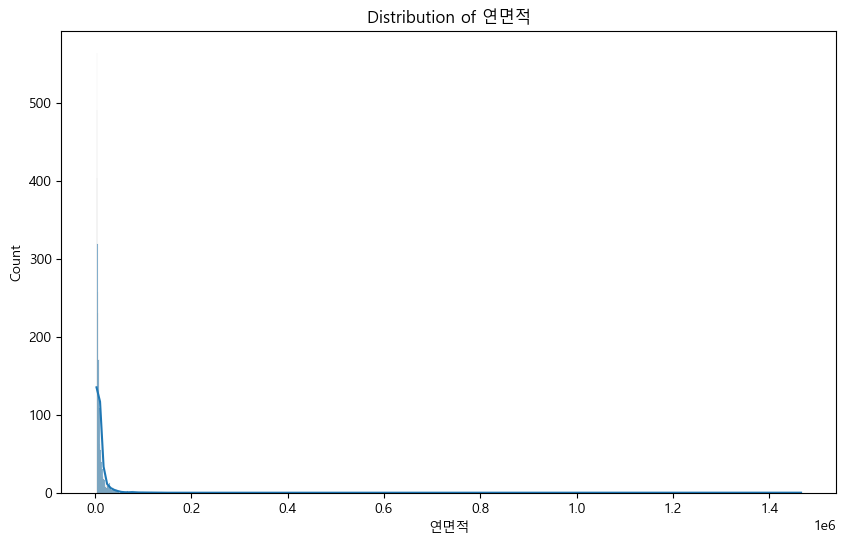

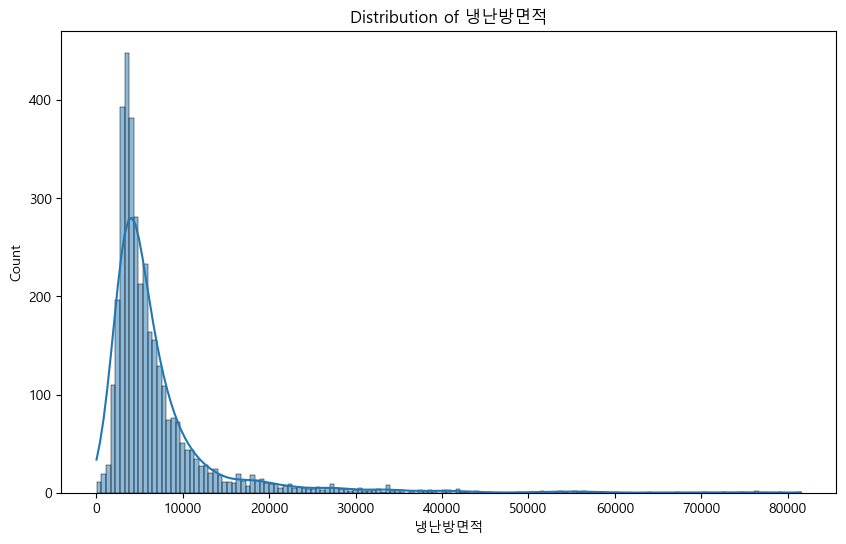

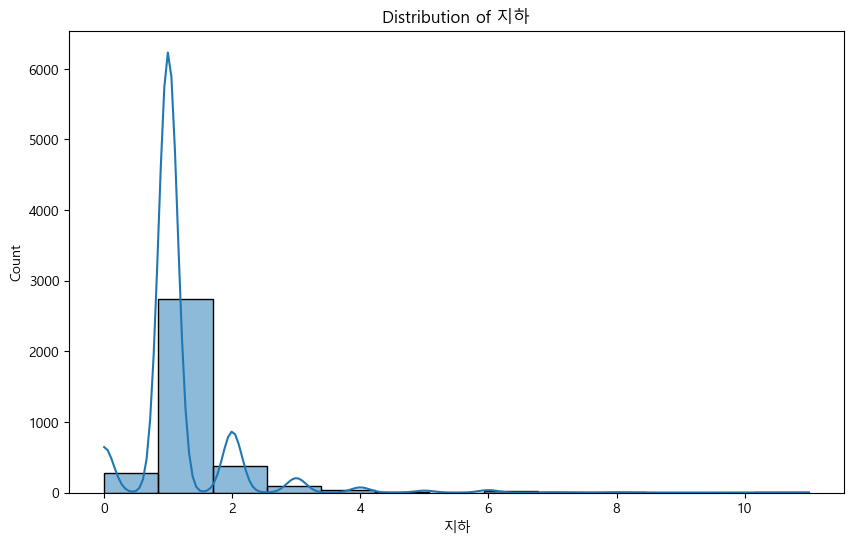

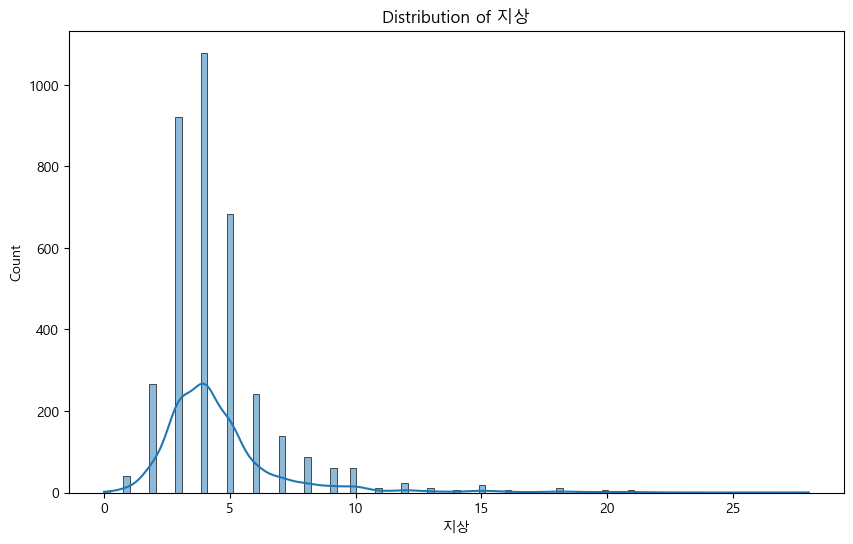

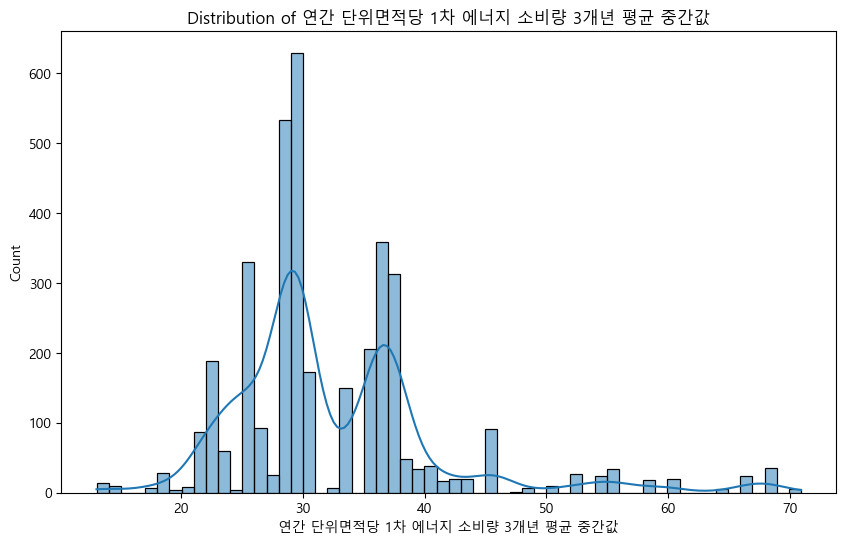

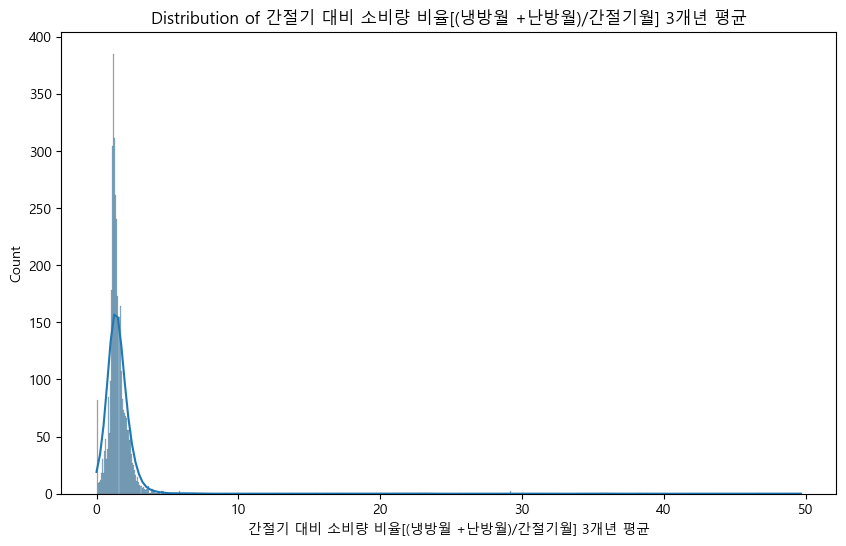

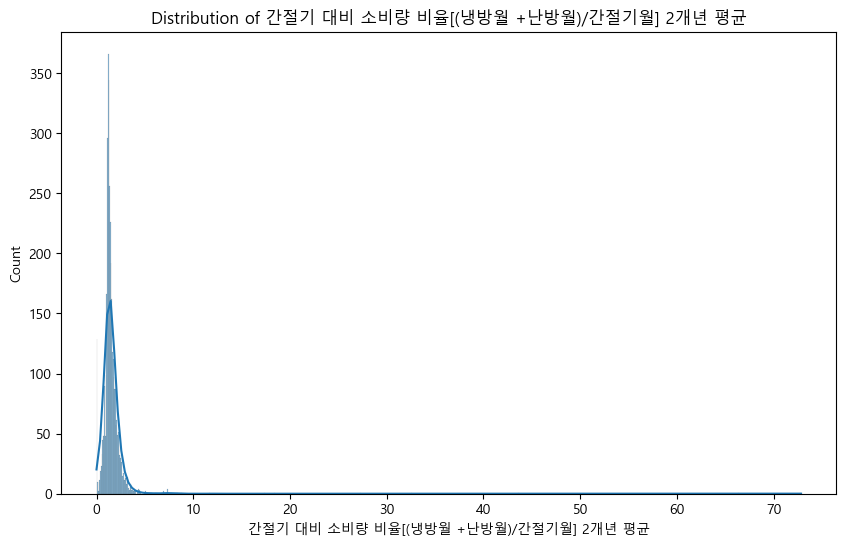

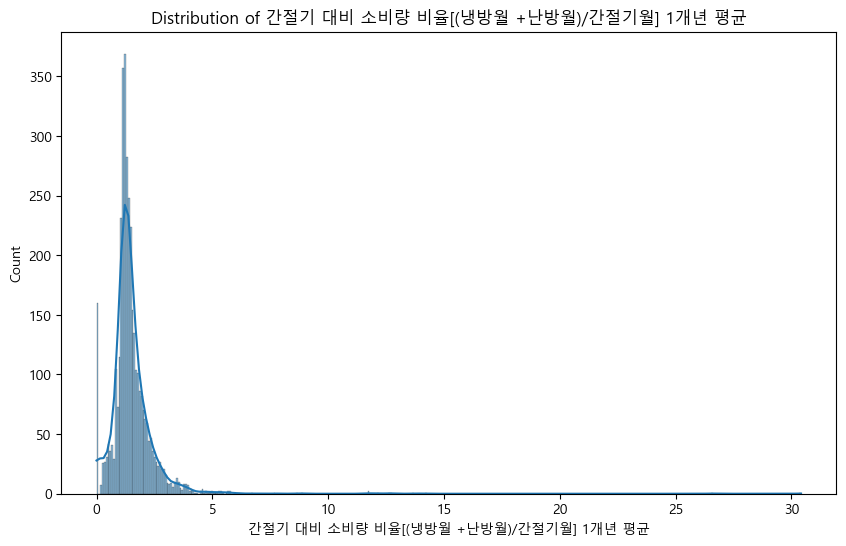

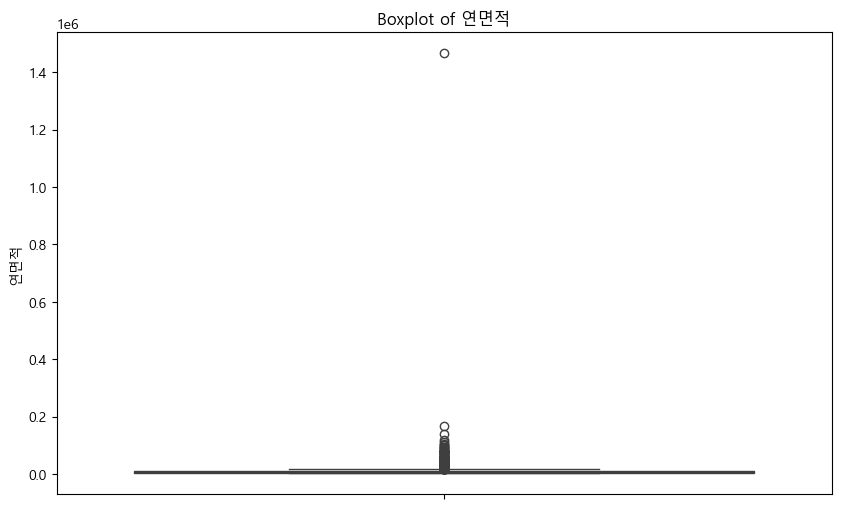

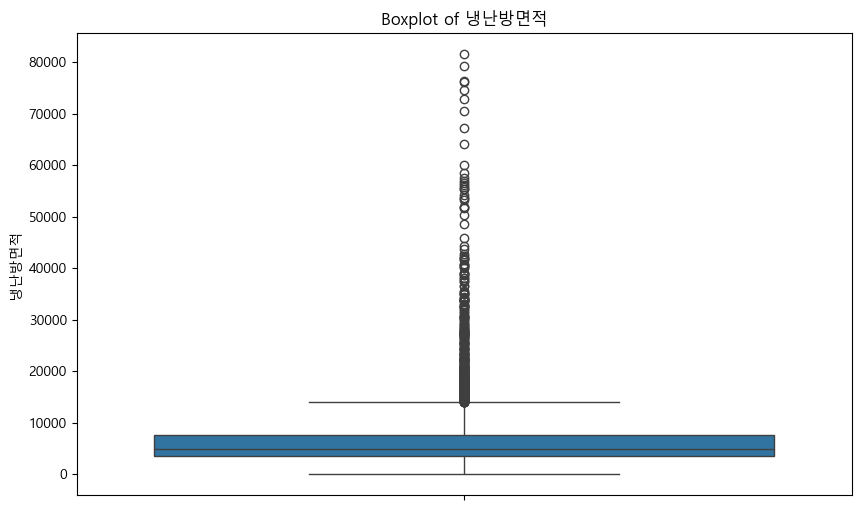

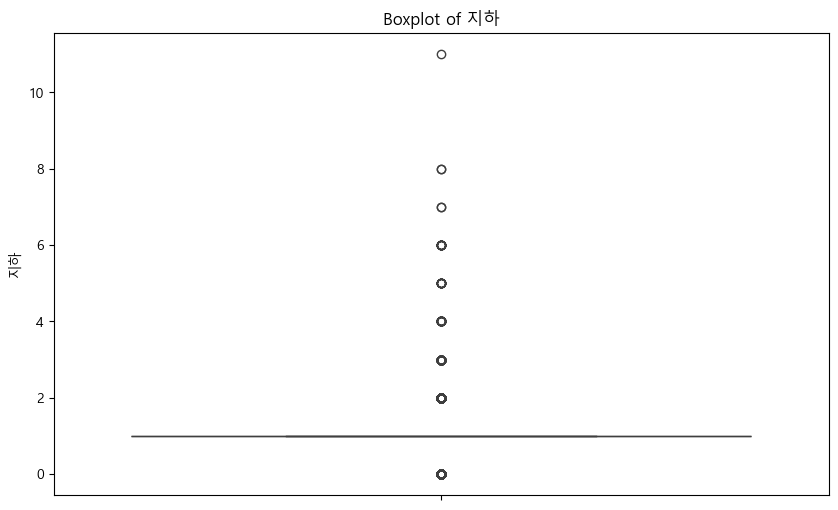

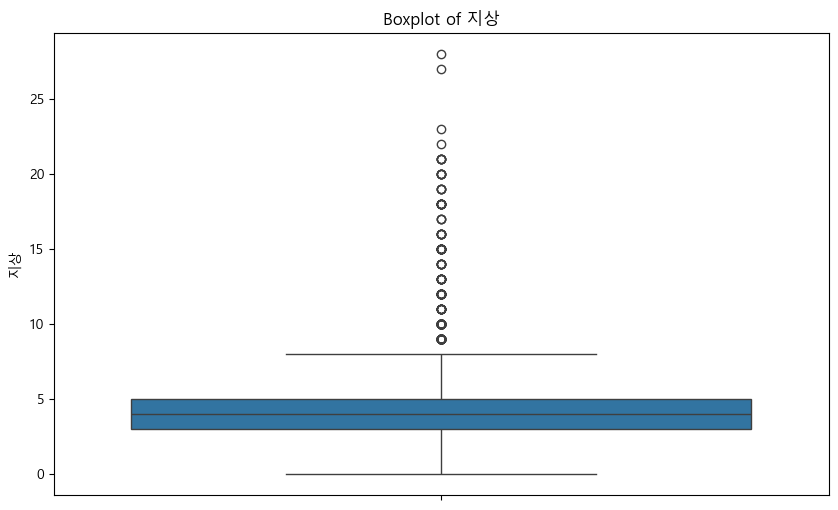

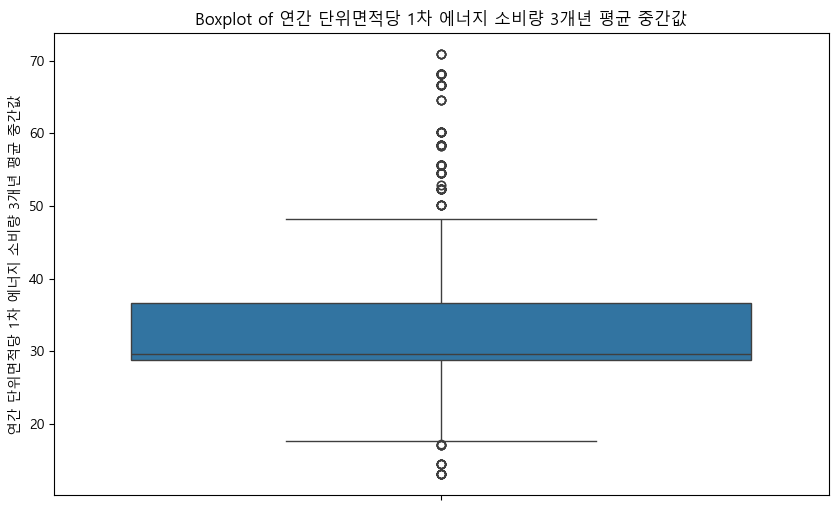

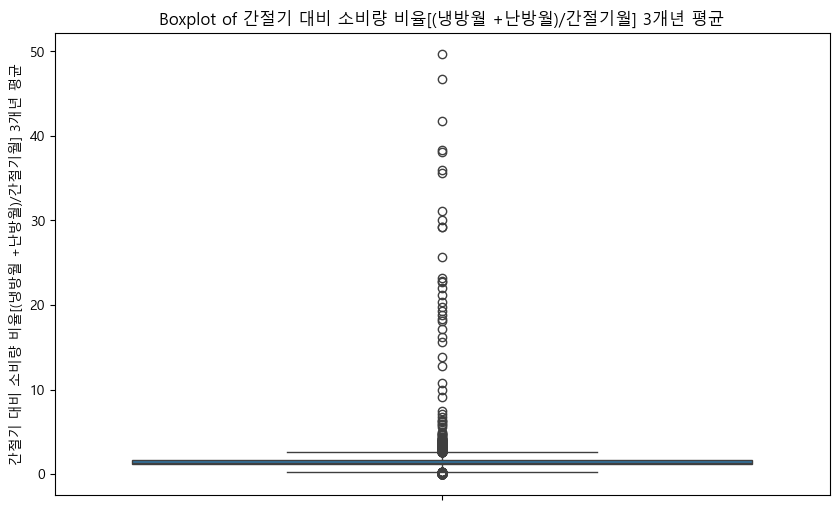

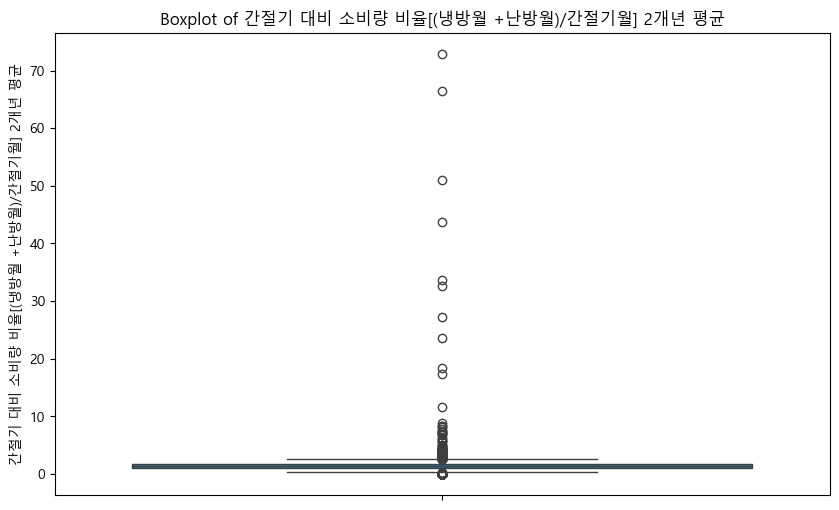

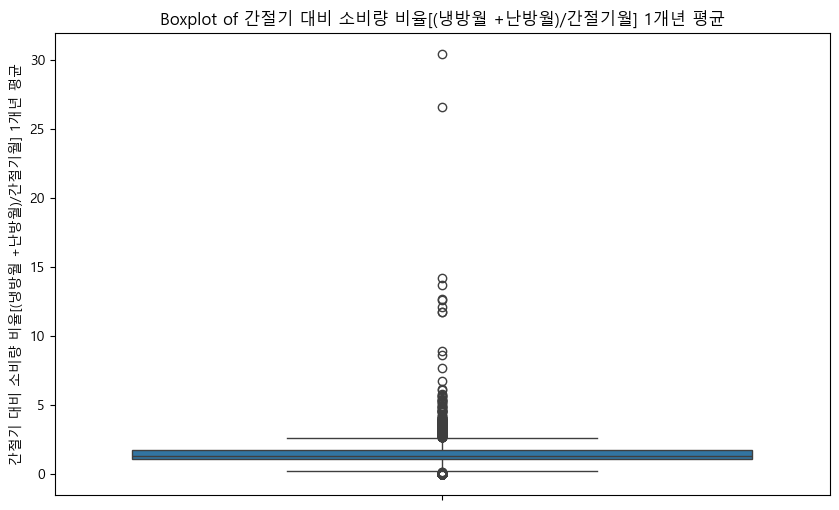

In [6]:
# 수치형 변수 히스토그램
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# 수치형 변수 박스플롯
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

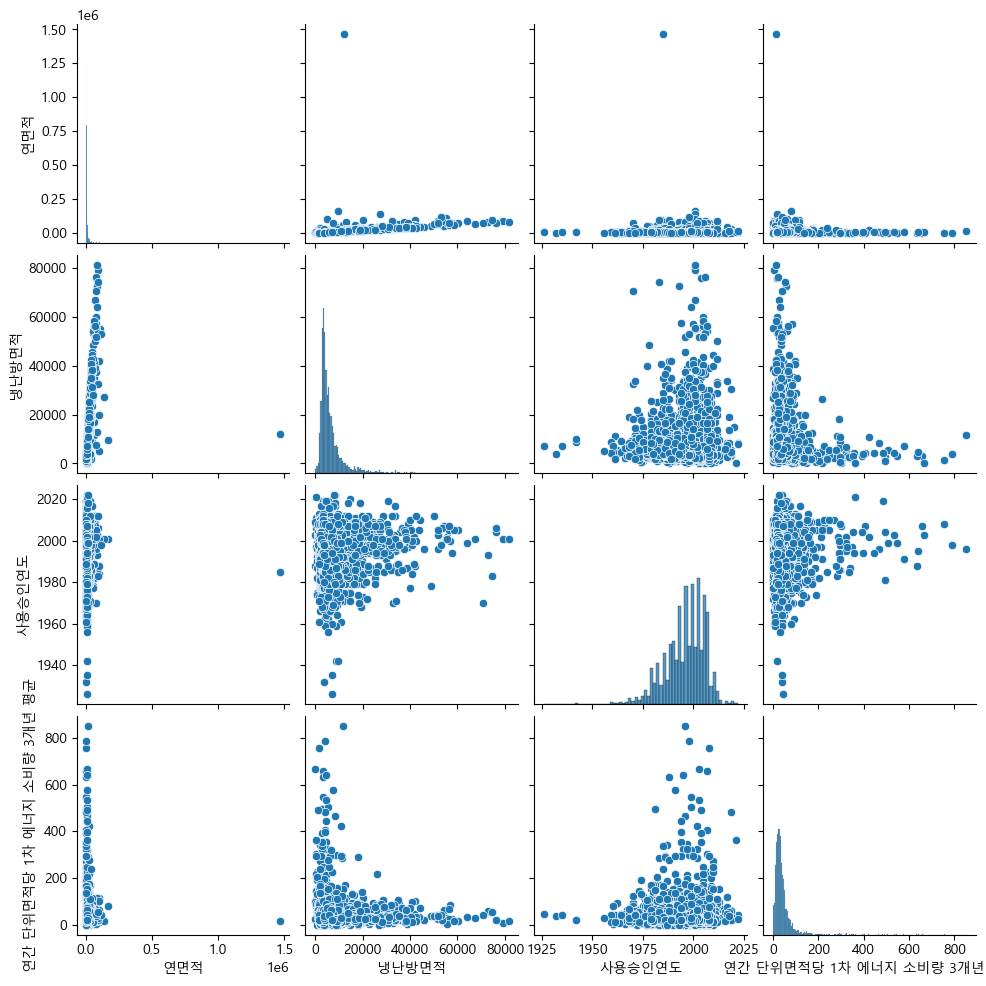

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# 선택한 수치형 변수들 간의 관계를 탐색하기 위한 산점도 행렬
sns.pairplot(data, vars=['연면적', '냉난방면적', '사용승인연도', '연간 단위면적당 1차 에너지 소비량 3개년 평균'])
plt.show()

연면적과 냉난방면적은 대체로 서로 비례하는 경향이 있다. 즉, 연면적이 클수록 냉난방면적도 큰 건물들이 많다.

사용승인연도와 연면적 및 냉난방면적 사이에는 일부 연관성이 있다. 최근에 승인된 건물들이 더 큰 경향이 있다.

연간 단위면적당 1차 에너지 소비량 3개년 평균은 연면적 및 냉난방면적과 비례하는 경향이 있다.

사용승인연도와 연간 단위면적당 1차 에너지 소비량 3개년 평균 사이에는, 최근에 승인된 건물들이 에너지 소비량이 다양한 범위에 분포되어 있는 경향이 있다.

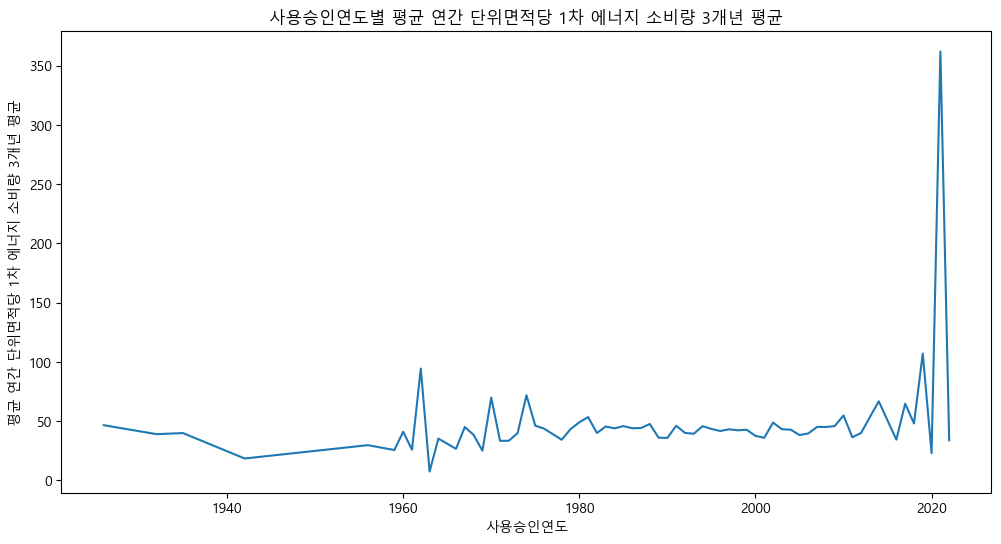

In [8]:
# 사용승인연도별 평균 연간 단위면적당 1차 에너지 소비량 3개년 평균
yearly_consumption = data.groupby('사용승인연도')['연간 단위면적당 1차 에너지 소비량 3개년 평균'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='사용승인연도', y='연간 단위면적당 1차 에너지 소비량 3개년 평균', data=yearly_consumption)
plt.title('사용승인연도별 평균 연간 단위면적당 1차 에너지 소비량 3개년 평균')
plt.xlabel('사용승인연도')
plt.ylabel('평균 연간 단위면적당 1차 에너지 소비량 3개년 평균')
plt.show()

전반적인 경향: 그래프 전반에 걸쳐 에너지 소비량은 1920년대에서 2000년대까지 비교적 일정하게 유지되다가, 2010년대 이후로 증가하는 경향이 나타난다.

특이점: 1950년대와 1960년대 초반에 에너지 소비량이 일시적으로 급증하는 현상이 있다. 이는 당시 건축된 특정 건물들의 에너지 소비 패턴이 영향을 미쳤을 가능성이 있다.

최근 추세: 2020년에 급격한 에너지 소비량 증가가 있으며, 이는 최근 건축된 특정 건물들이 데이터를 왜곡했을 가능성이 있다.

c:\Users\82106\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\82106\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


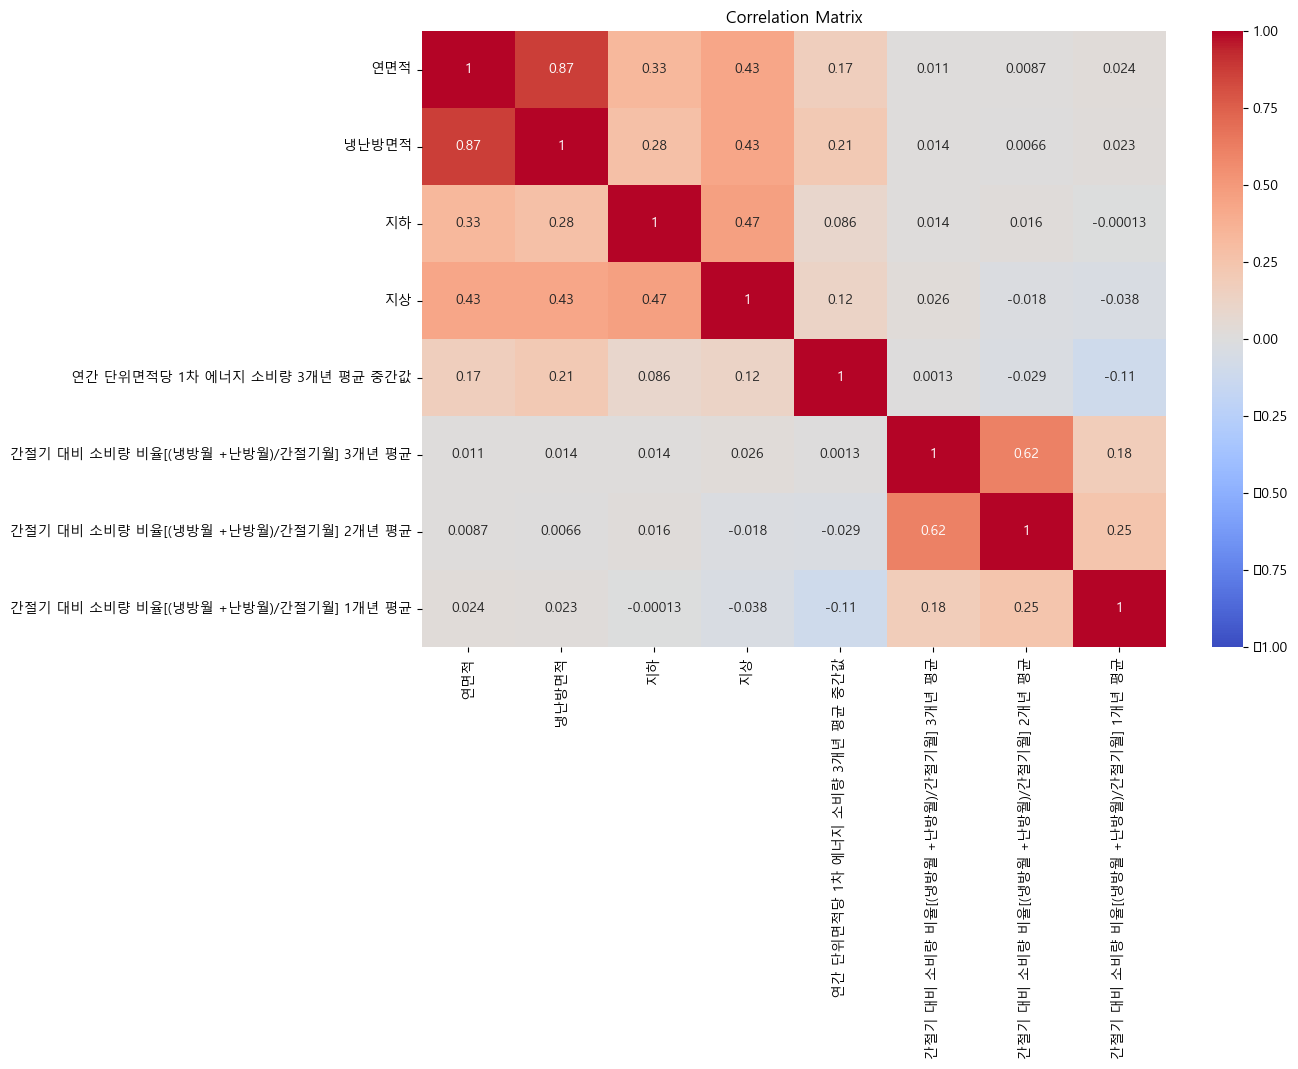

In [9]:
# 수치형 변수 리스트
numerical_cols = [
    '연면적', '냉난방면적', '지하', '지상',
    '연간 단위면적당 1차 에너지 소비량 3개년 평균 중간값',
    '간절기 대비 소비량 비율[(냉방월 +난방월)/간절기월] 3개년 평균',
    '간절기 대비 소비량 비율[(냉방월 +난방월)/간절기월] 2개년 평균',
    '간절기 대비 소비량 비율[(냉방월 +난방월)/간절기월] 1개년 평균'
]

# 수치형 변수만 선택
data_numeric = data[numerical_cols].dropna()

# 상관관계 행렬 계산
correlation_matrix = data_numeric.corr()

# 상관관계 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

높은 상관관계:

연면적과 냉난방면적 (0.87)

연면적과 지상 (0.43)

냉난방면적과 지상 (0.47)

중간 정도의 상관관계:

연면적과 지하 (0.33)

냉난방면적과 지하 (0.28)

지하와 지상 (0.47)

간절기 대비 소비량 비율 3개년 평균과 2개년 평균 (0.62)

낮은 상관관계:

연면적, 냉난방면적, 지하, 지상과 연간 단위면적당 1차 에너지 소비량 3개년 평균 중간값 간의 상관관계는 매우 낮음 (0.086 이하)

간절기 대비 소비량 비율과 다른 변수들 간의 상관관계는 매우 낮음 (0.18 이하)

In [10]:
# 데이터 불러오기
data = pd.read_csv('C:/Users/82106/Desktop/데이터 분석 프로젝트 2/데이콘 빅데이터 분석/data/국토안전관리원_공공건축물 에너지 소비량_20230331.csv',encoding='cp949')

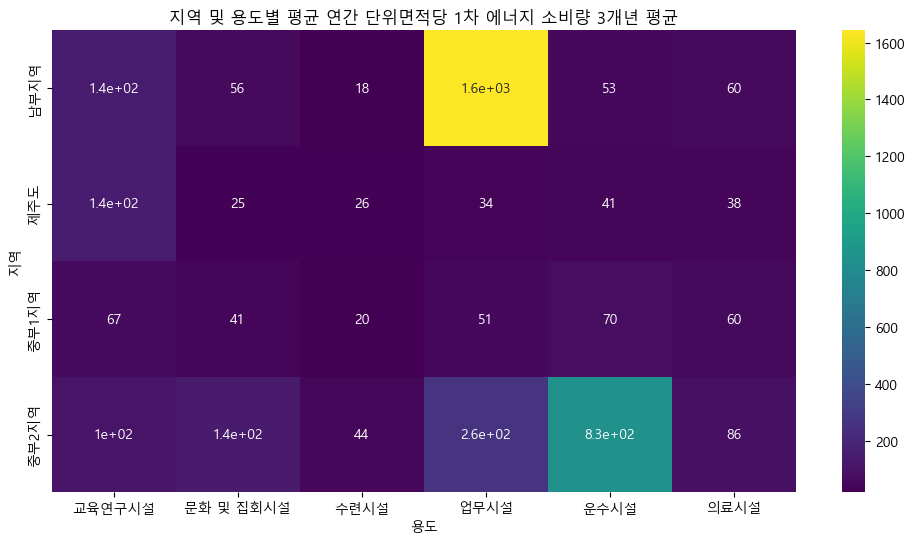

In [11]:
import numpy as np

# 필요한 열 선택 및 '미제출' 값을 NaN으로 변환
data.replace('미제출', np.nan, inplace=True)

# 쉼표 제거 후 데이터 타입 변환
data['연간 단위면적당 1차 에너지 소비량 3개년 평균'] = data['연간 단위면적당 1차 에너지 소비량 3개년 평균'].astype(str).str.replace(',', '').astype(float)

# 피벗 테이블 생성
pivot_table = data.pivot_table(values='연간 단위면적당 1차 에너지 소비량 3개년 평균', index='지역', columns='용도', aggfunc='mean')

# 피벗 테이블 히트맵 시각화
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, cmap='viridis')
plt.title('지역 및 용도별 평균 연간 단위면적당 1차 에너지 소비량 3개년 평균')
plt.show()

남부지역에서는 교육연구시설과 업무시설에서  , 

제주도에서는 교육연구시설에서 

중부2지역에서는 교육연구시설 , 문화 및 집회시설 , 업무시설  , 운수시설 에서 높은 에너지 사용량이 나타났다.

중부 1지역: 서울 위 

중부 2지역 : 서울 ~ 세종

In [12]:
# 쉼표 제거 후 데이터 타입 변환
data['연간 단위면적당 1차 에너지 소비량 3개년 평균'] = data['연간 단위면적당 1차 에너지 소비량 3개년 평균'].astype(str).str.replace(',', '').astype(float)

# '사용승인연도' 칼럼에서 연도만 추출하여 int형으로 변환
data['사용승인연도'] = data['사용승인연도'].astype(str).str[:4].astype(int)

# 사용승인연도별로 데이터 묶기 및 평균 에너지 소비량 계산
yearly_data = data.groupby('사용승인연도')['연간 단위면적당 1차 에너지 소비량 3개년 평균'].mean().reset_index()

# 결과 확인
print(yearly_data.head())

   사용승인연도  연간 단위면적당 1차 에너지 소비량 3개년 평균
0    1926                      46.480
1    1932                      38.900
2    1935                      39.810
3    1938                         NaN
4    1942                      18.355


용도별 평균 전기 사용량

In [13]:
# 용도별 평균 전기 사용량 계산
average_usage = data.groupby('용도')['전기 (KWH)'].mean().reset_index()

# 결과 확인
print(average_usage)

          용도      전기 (KWH)
0     교육연구시설  5.715527e+05
1  문화 및 집회시설  6.051618e+05
2       수련시설  1.309677e+05
3       업무시설  1.283234e+06
4       운수시설  1.182704e+06
5       의료시설  4.897870e+05


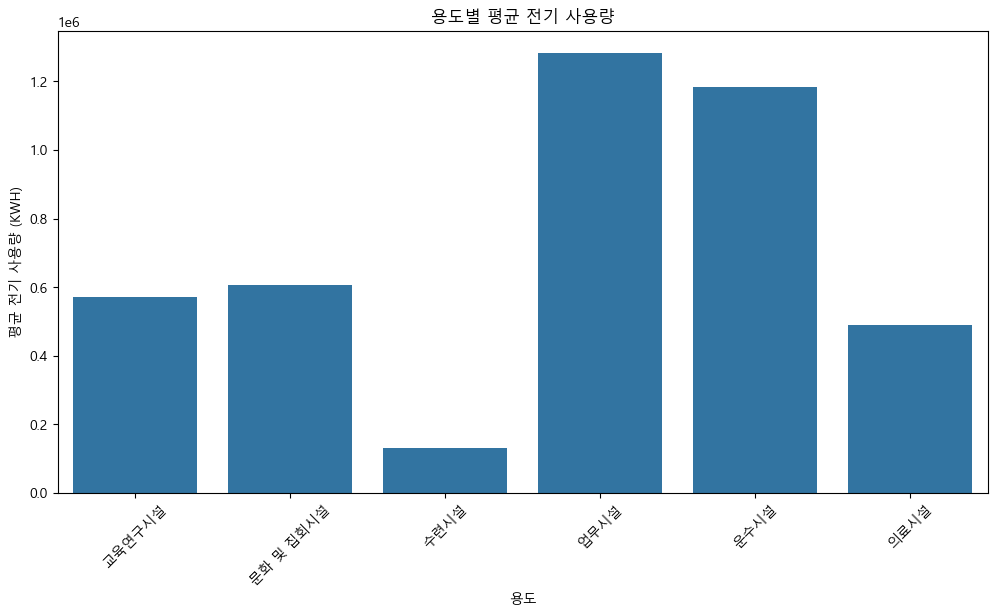

In [14]:
# 용도별 평균 전기 사용량 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x='용도', y='전기 (KWH)', data=average_usage)
plt.title('용도별 평균 전기 사용량')
plt.xlabel('용도')
plt.ylabel('평균 전기 사용량 (KWH)')
plt.xticks(rotation=45)
plt.show()

In [15]:
# 용도별 평균 가스 사용량 계산
average_gas_usage = data.groupby('용도')['가스 (KWH)'].mean().reset_index()

# 결과 확인
print(average_gas_usage)

          용도      가스 (KWH)
0     교육연구시설  6.741617e+05
1  문화 및 집회시설  6.059382e+05
2       수련시설  4.913547e+05
3       업무시설  4.703373e+06
4       운수시설  6.677479e+05
5       의료시설  2.565644e+06


용도별 평균 가스 사용량

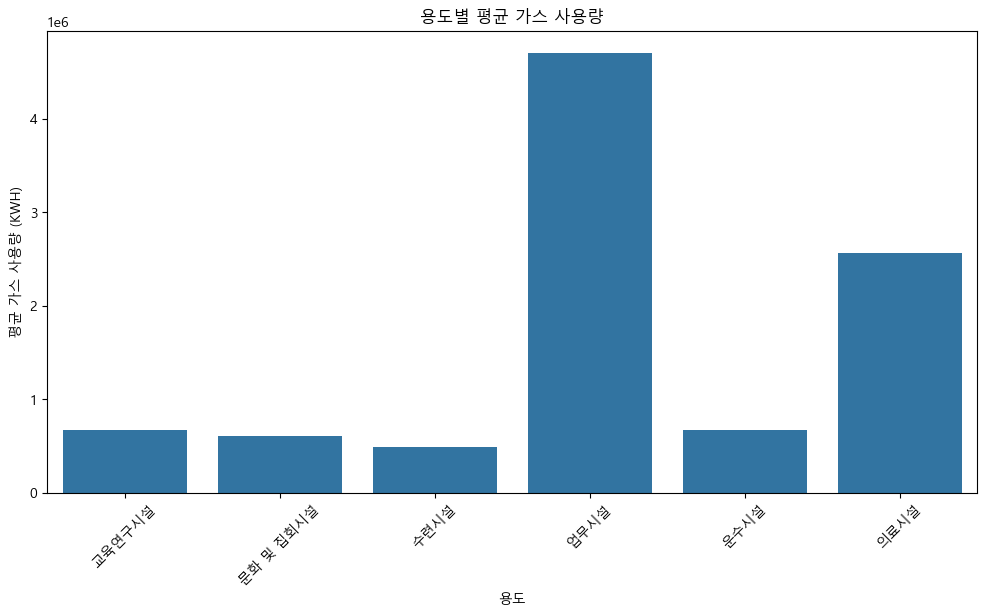

In [16]:
# 용도별 평균 가스 사용량 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x='용도', y='가스 (KWH)', data=average_gas_usage)
plt.title('용도별 평균 가스 사용량')
plt.xlabel('용도')
plt.ylabel('평균 가스 사용량 (KWH)')
plt.xticks(rotation=45)
plt.show()

In [17]:
# '면적' 열의 값을 처리하여 범위의 평균값으로 변환하는 함수 정의
def convert_area_to_float(area):
    if pd.isna(area):
        return np.nan
    area = area.replace('㎡', '').replace(',', '')
    if '~' in area:
        lower, upper = area.split('이상~')
        return (float(lower) + float(upper.replace('미만', ''))) / 2
    elif '이상' in area:
        return float(area.replace('이상', ''))
    elif '미만' in area:
        return float(area.replace('미만', ''))
    return float(area)

In [18]:
# '면적' 열의 값을 변환
data['면적'] = data['면적'].apply(convert_area_to_float)

# 용도별 평균 면적 계산
average_area = data.groupby('용도')['면적'].mean().reset_index()

# 결과 확인
print(average_area)

          용도           면적
0     교육연구시설  6423.560556
1  문화 및 집회시설  7330.855019
2       수련시설  6219.512195
3       업무시설  6602.605863
4       운수시설  7247.572816
5       의료시설  7585.051546


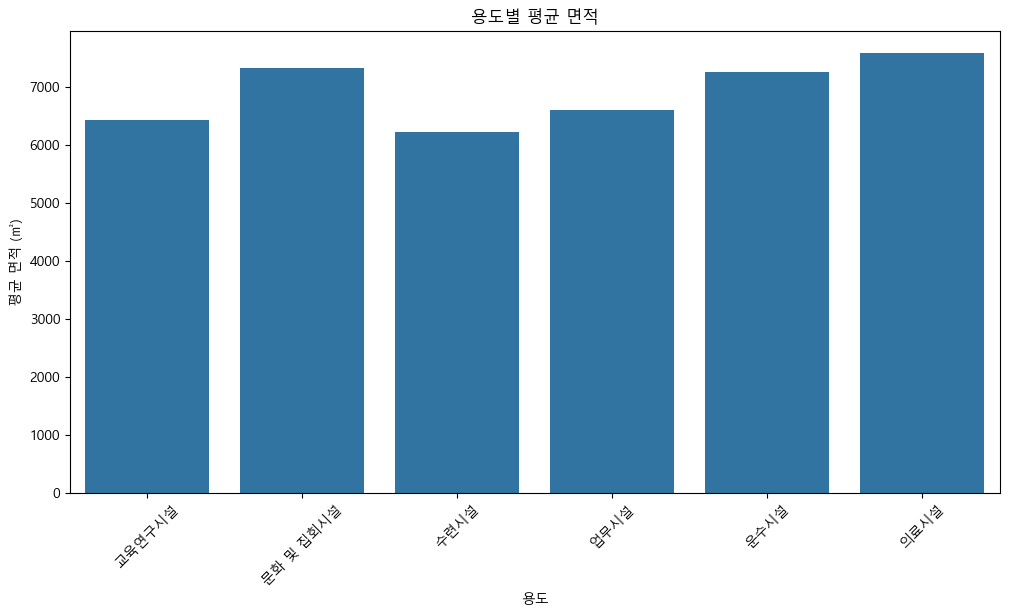

In [19]:
# 용도별 평균 면적 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x='용도', y='면적', data=average_area)
plt.title('용도별 평균 면적')
plt.xlabel('용도')
plt.ylabel('평균 면적 (㎡)')
plt.xticks(rotation=45)
plt.show()

연간 단위면적당 1차 에너지 소비량 3개년 평균 이 칼럼의 +-5 정도인 건물들이 하나의 군집

In [29]:
# 군집화 수행 (연간 단위면적당 1차 에너지 소비량 3개년 평균 +-5 범위)
def assign_cluster(energy_value, step=15):
    return int(energy_value // step)

data['군집'] = data['연간 단위면적당 1차 에너지 소비량 3개년 평균'].apply(assign_cluster)

각 군집 중에서 연면적이 가장 작은 상위 10개 건물들을 출력

In [35]:
# 각 군집에서 연면적이 가장 작은 상위 10개 건물 선택
smallest_buildings_by_cluster = data.groupby('군집').apply(lambda x: x.nsmallest(10, '연면적')).reset_index(drop=True)

# 결과 출력
for cluster in sorted(smallest_buildings_by_cluster['군집'].unique()):
    print(f"군집 {cluster}에 속하는 연면적이 가장 작은 상위 10개 건물:")
    cluster_data = smallest_buildings_by_cluster[smallest_buildings_by_cluster['군집'] == cluster]
    print(cluster_data[['건물명', '연면적', '연간 단위면적당 1차 에너지 소비량 3개년 평균']])
    print("\n")

C:\Users\82106\AppData\Local\Temp\ipykernel_7368\2693464945.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  smallest_buildings_by_cluster = data.groupby('군집').apply(lambda x: x.nsmallest(10, '연면적')).reset_index(drop=True)


군집 0에 속하는 연면적이 가장 작은 상위 10개 건물:
                   건물명      연면적  연간 단위면적당 1차 에너지 소비량 3개년 평균
0  남부운전면허시험장 26동 (주차장)  3007.11                        0.00
1              서라벌문화회관  3030.81                        9.84
2               문화체육센터  3033.57                       11.87
3      임학임산학관(디자인1978)  3050.52                       10.50
4             광주고객지원센터  3054.48                        0.42
5               안성문예회관  3064.63                       12.93
6           08. 포항시학습관  3064.85                       10.16
7             광주충장로우체국  3075.64                        9.56
8           동대문구정보화도서관  3094.02                        6.77
9              본부동 주1동  3104.00                       12.35


군집 1에 속하는 연면적이 가장 작은 상위 10개 건물:
                         건물명      연면적  연간 단위면적당 1차 에너지 소비량 3개년 평균
10                   승선생활4호관  3000.00                       19.01
11                     거제도서관  3004.00                       16.95
12                     수산가공관  3005.04                       21.54
13        